# GPCRmd-NMR integrates hypothesis generation and spectroscopic solutions

In this Jupyter Notebook you can generate the plots for the section "Integrative enhancement of spectroscopic pipelines via GPCRmd-NMR" figure 4G-I. The workflow includes reading computational chemical shift (CS) files and MD files.



### Load Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import MDAnalysis as mda
import matplotlib.pyplot as plt
import seaborn as sns

### Load Functions

In [2]:
def read_computational_CS_file(file_path):
    """
    Reads data from a CSV file, creates a dictionary with combined keys,
    and converts values to floats.

    Parameters:
    - file_path (str): Path to the input CSV file.

    Returns:
    dict: Dictionary with combined keys and corresponding float values.
    """
    # Initialize an empty dictionary to store data
    data_dict = {}

    # Open and read the CSV file
    with open(file_path, 'r') as file:
        # Use CSV reader with ';' as the delimiter
        csv_reader = csv.reader(file, delimiter=';')
        
        # Iterate through each row in the CSV file
        for row in csv_reader:
            # Check if the row has at least two elements
            if len(row) >= 2:
                # Combine the first two elements as the key
                key = f"{row[0]}_{row[1]}"
                
                # Replace commas with points and convert the remaining values to floats
                values = [float(value.replace(',', '.')) for value in row[4:-1]]
                
                # Add the key-value pair to the dictionary
                data_dict[key] = values

    # Return the dictionary containing combined keys and float values
    return data_dict

### Input parameters

In [3]:
experimental_CS_file = 'ComputationalData/CS/cs_dyn872_16264.csv'
pdb_file = 'ComputationalData/MD/17954_dyn_872.pdb'
trajectory = 'ComputationalData/MD/16264_trj_872.xtc'

### Read MD and CS data

In [4]:
# Read the experimental CS data from the CSV file
data_comp = read_computational_CS_file(experimental_CS_file)

#Load the trajectory
traj = mda.Universe(pdb_file, trajectory)

# compute the distance between CAs of PRO 80 and PHE 142 over the trajectory
CA_V204 = traj.select_atoms("protein and resid 204 and name CA")
CA_A272 = traj.select_atoms("protein and resid 272 and name CA")

distances = []

for ts in traj.trajectory:
    distances.append(np.linalg.norm(CA_V204.positions - CA_A272.positions))

# delete the first element of the list
del distances[0]

# Extract the time values from the frames of the MD, each frame is 4fs
time = np.arange(0, len(distances))
time = time / 5

/opt/miniconda3/envs/mdanalysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/opt/miniconda3/envs/mdanalysis/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


### Plot the CS and Distance V204-A272 evolution

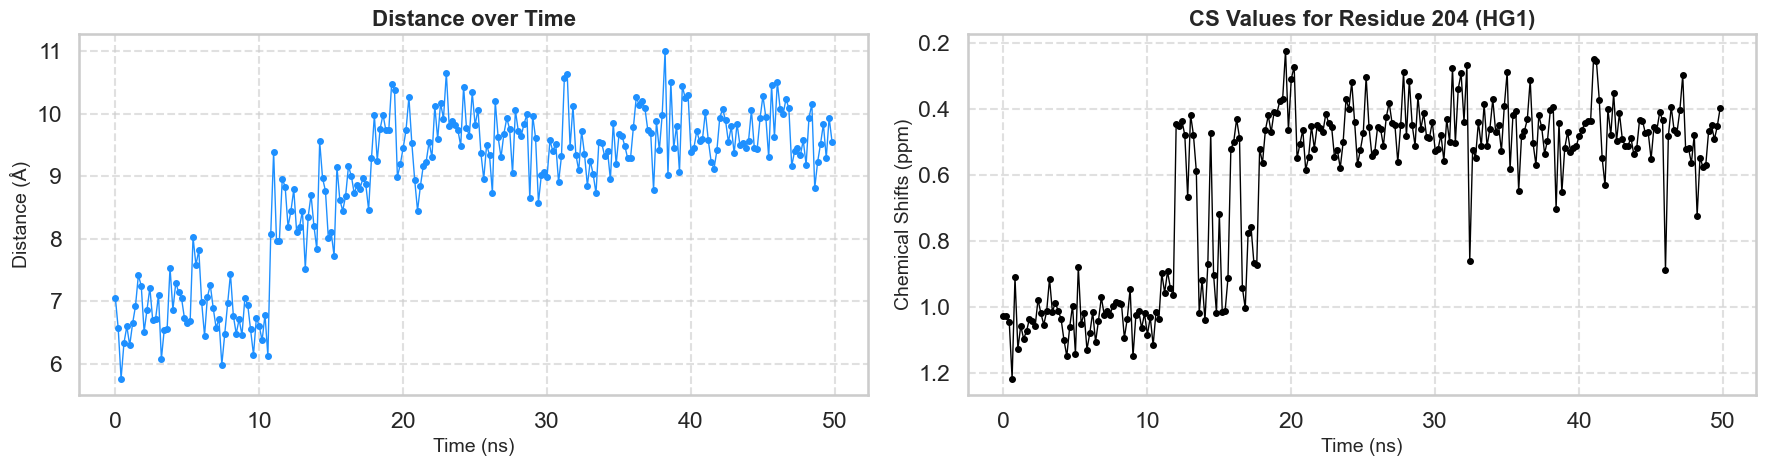

In [5]:
# Set Seaborn style for a publication-quality figure
sns.set_context("talk")
sns.set_style("whitegrid")

residue_id_to_plot = 204
atom_type_to_plot = 'HG1'

# Plot a specific residue given its residue ID and the atom type
key_to_plot = f"{residue_id_to_plot}_{atom_type_to_plot}"
CS_data_to_plot = data_comp.get(key_to_plot)

if CS_data_to_plot is None:
    print(f"No CS data found for key {key_to_plot}")
else:
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
    # Plot distance over time
    axes[0].plot(time[:250], distances[:250], marker='o', linestyle='-', color='dodgerblue', markersize=4,  linewidth=1)
    axes[0].set_xlabel('Time (ns)', fontsize=14)
    axes[0].set_ylabel('Distance (Å)', fontsize=14)
    axes[0].set_title('Distance over Time', fontsize=16, fontweight='bold')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Plot CS data over time
    axes[1].plot(time[:250], CS_data_to_plot[:250], marker='o', linestyle='-', color='black', markersize=4, linewidth=1)
    axes[1].set_xlabel('Time (ns)', fontsize=14)
    axes[1].set_ylabel('Chemical Shifts (ppm)', fontsize=14)
    axes[1].set_title(f'CS Values for Residue {residue_id_to_plot} ({atom_type_to_plot})', fontsize=16, fontweight='bold')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

